<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/10/10_note_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Density Based Clustering Part3

170. HDBSCAN python library (hdbscan)
171. Demo: Implementing HDBSCAN (partial implementation)
172. HDBSCAN general guideliness
173. Demo: Clustering iris and digits (mnist784) with HDBSCAN
174. Demo: Clustering animals with HDBSCAN (categorical data)
175. Robust scaler (demo prerequisite)
176. Demo: Clustering phones with HDBSCAN (mixed data)
177. Case study: Geospatial clustering with DBSCAN and HDBSCAN - introduction
178. Case study: Geospatial clustering with DBSCAN and HDBSCAN
179. Chapter summary

### HDBSCAN

#### API - HDBSCAN

<font size='4'>

```python
class hdbscan.hdbscan_.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, max_cluster_size=0,
  metric='euclidean', alpha=1.0, p=None, algorithm='best', leaf_size=40, memory=Memory(location=None),
  approx_min_span_tree=True, gen_min_span_tree=False, core_dist_n_jobs=4, cluster_selection_method='eom',
  allow_single_cluster=False, prediction_data=False, branch_detection_data=False, match_reference_implementation=False,
  cluster_selection_epsilon_max=inf, **kwargs)
```

</font>

methods:

<font size='4'>


```python
fit(X)
fit_predict(X)
```

</font>


attributes:

<font size='4'>

```python
labels_ # cluster id (noise point 為 -1)
probabilities_ # point 屬於該 cluster 成員的機率 (noise 為 0)
outlier_scores_ # [0, 1] outlier score; 表示 point 有多像 outlier
relative_validity_ # 每個 cluster 的 DBCV 近似值
single_linkage_tree_
condensed_tree_
minimum_spanning_tree_
```

</font>


#### HDBSCAN Parameters

- `min_samples`: 計算 core distance
  - 高值: 較多 noise (?) # todo_spencer
    - 高 core distance -> 高 reachability distance
  - 低值: 較少 noise
- `min_cluster_size`: 建構 condensed tree 時用到
  - 若兩個 branch 的 point 數目都 > `min_cluster_size`, 則維持拆分的 branch
  - 高值: 較少 cluster
    - 維持拆分的條件難達到 -> 常常合併 branch
  - 低值: 較多 cluster
  

#### HDBSCAN 的限制

- parameter 需要 tune
- feature 數太大時 (>100), 效率不佳 # todo_spencer
- 可處理不同 density 的 clusters, 但較難處理內部 density 差異很大的 cluster

#### HDBSCAN 結果

##### mnist dataset

true label:

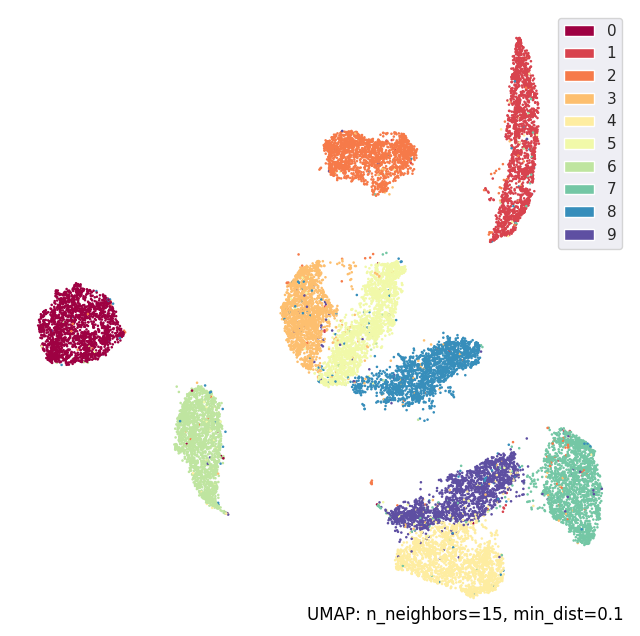

HDBSCAN:

<pre>
ARI : 0.0620451604091957
ARI sub : 0.9949149740514572
noise size : 14873
Silouethe : -0.0946336623562824
Silouethe sub : 0.1854009565723897
DBCV : 0.0275406710127663
</pre>

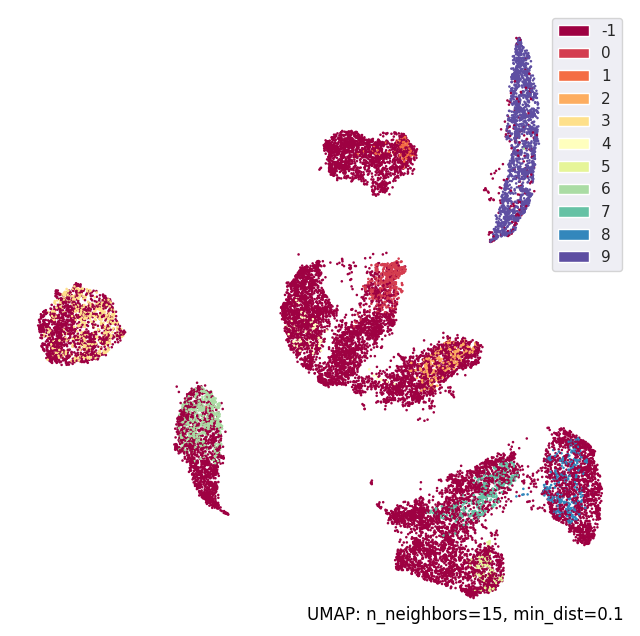

##### iris dataset

true label:

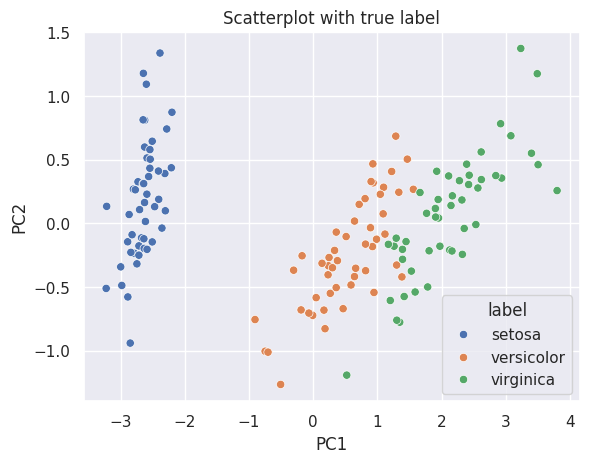

HDBSCAN:

<pre>
ARI : 0.5681159420289855
ARI sub : 0.5681159420289855
noise size : 0
Silouethe : 0.6867350732769777
Silouethe sub : 0.5034774406932961
DBCV : 0.6204492461686135
</pre>

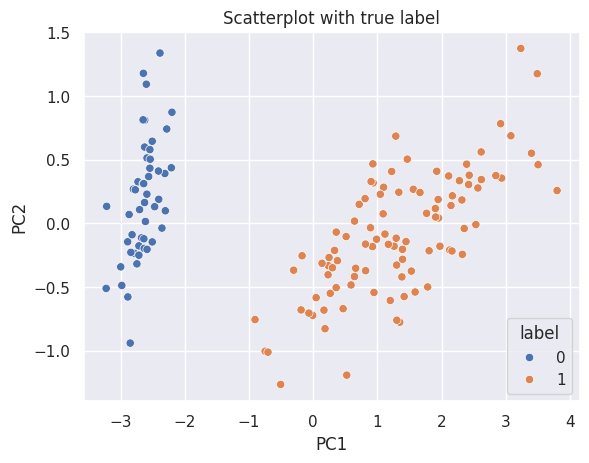

##### animal zoo dataset (categorical data)

true label:

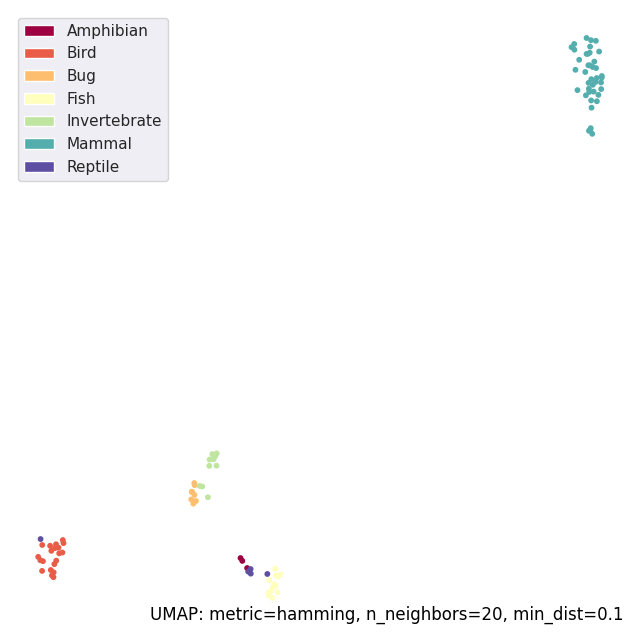

HDBSCAN:

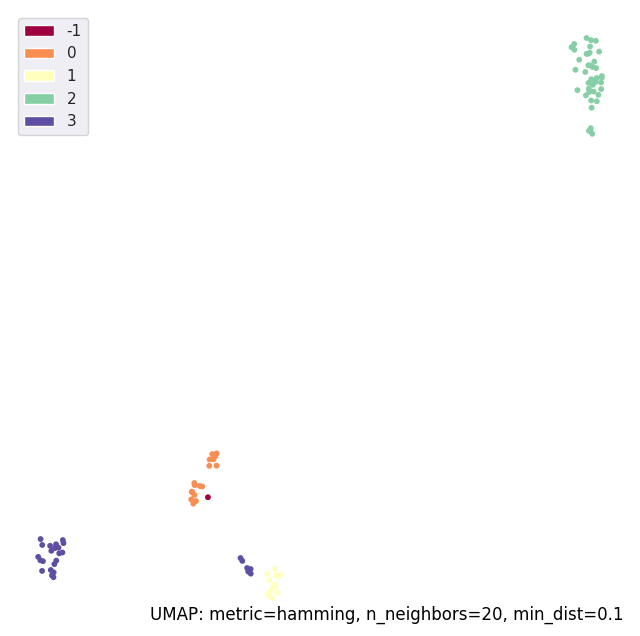

### RobustScaler

- $\Large scaled\_x=\frac{x-median}{IQR}$
- 根據中位數 (median)、四分位距 (IQR) 來進行縮放

- 好處:
  - 能夠抵抗 outlier (vs. mean、std)
  - 可處理輕、中度 skewed 的 feature
    - gpt:
    ```
    當特徵有輕度偏斜時，中位數能提供更準確的中心位置，而四分位距則可以反映數據集中部分的變異範圍。
    因此，對於偏斜的特徵，使用中位數和 IQR 進行縮放可以避免偏態對模型產生過大的影響，從而使數據更接近標準化。
    ```
- 壞處:
  - 與 StandardScalar 相比, 值域較大
    - gpt:
    ```
    與 StandardScaler 不同，RobustScaler 的結果並不會強制使數據符合單一的平均值和標準差。
    StandardScaler 的縮放方式讓數據落在均值為 0、標準差為 1 的範圍內，這有助於使大部分數據集中於一個較小的範圍。
    RobustScaler 依賴於 IQR 進行縮放，這並不會保證所有數據點都落在較小的範圍內。
    由於數據中位數和 IQR 本身可能較小或不均勻分布，縮放後的數據可能擴展到更大的範圍，因此導致值域較大的結果。
    ```

#### API - RobustScaler

<font size='4'>

```python
class sklearn.preprocessing.RobustScaler(*, with_centering=True,
  with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
```

</font>

methods:

<font size='4'>


```python
fit() # 計算 median、IQR
predict() # scaling
fit_predict()
```

</font>


### Geospatial Clustering

輸入 feature 為 latitude (緯度)、longitude (經度), 根據空間鄰近性地理位置進行 clustering

#### Haversine Distance

計算地球上兩點之間的最短距離

$d=r\delta$

$\delta=2 arcsin\left(\sqrt{sin^2\left(\frac{\Delta lat}{2}\right)+cos(lat_A)cos(lat_B)sin^2\left(\frac{\Delta lon}{2}\right)}\right)$

[參考](https://www.math.ksu.edu/~dbski/writings/haversine.pdf)

[wiki](https://en.wikipedia.org/wiki/Haversine_formula)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Illustration_of_great-circle_distance.svg/220px-Illustration_of_great-circle_distance.svg.png" width=300></img>
<img src="https://cdn.britannica.com/04/64904-050-D2054D06/cutaway-drawing-latitude-place-longitude-sizes-angles.jpg" width=500></img>

##### API - haversine_distances

<font size='4'>

```python
sklearn.metrics.pairwise.haversine_distances(X, Y=None) # 回傳圓心角
```

</font>

[api](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.haversine_distances.html)

#### Folium library

生成互動式地圖

<font size='4'>

```python
import folium

m = folium.Map(location=[-27.5717, -48.6256], zoom_start=9)

folium.CircleMarker(
    location=[-27.55, -48.8],
    radius=50,
    color="cornflowerblue",
).add_to(m)
```

</font>

#### Flickr London dataset

- 資料集包含從 Flickr 收集的 2 萬組照片記錄, 範圍限定在倫敦市的地理邊界內
- 目標: 找出推薦旅遊的熱點

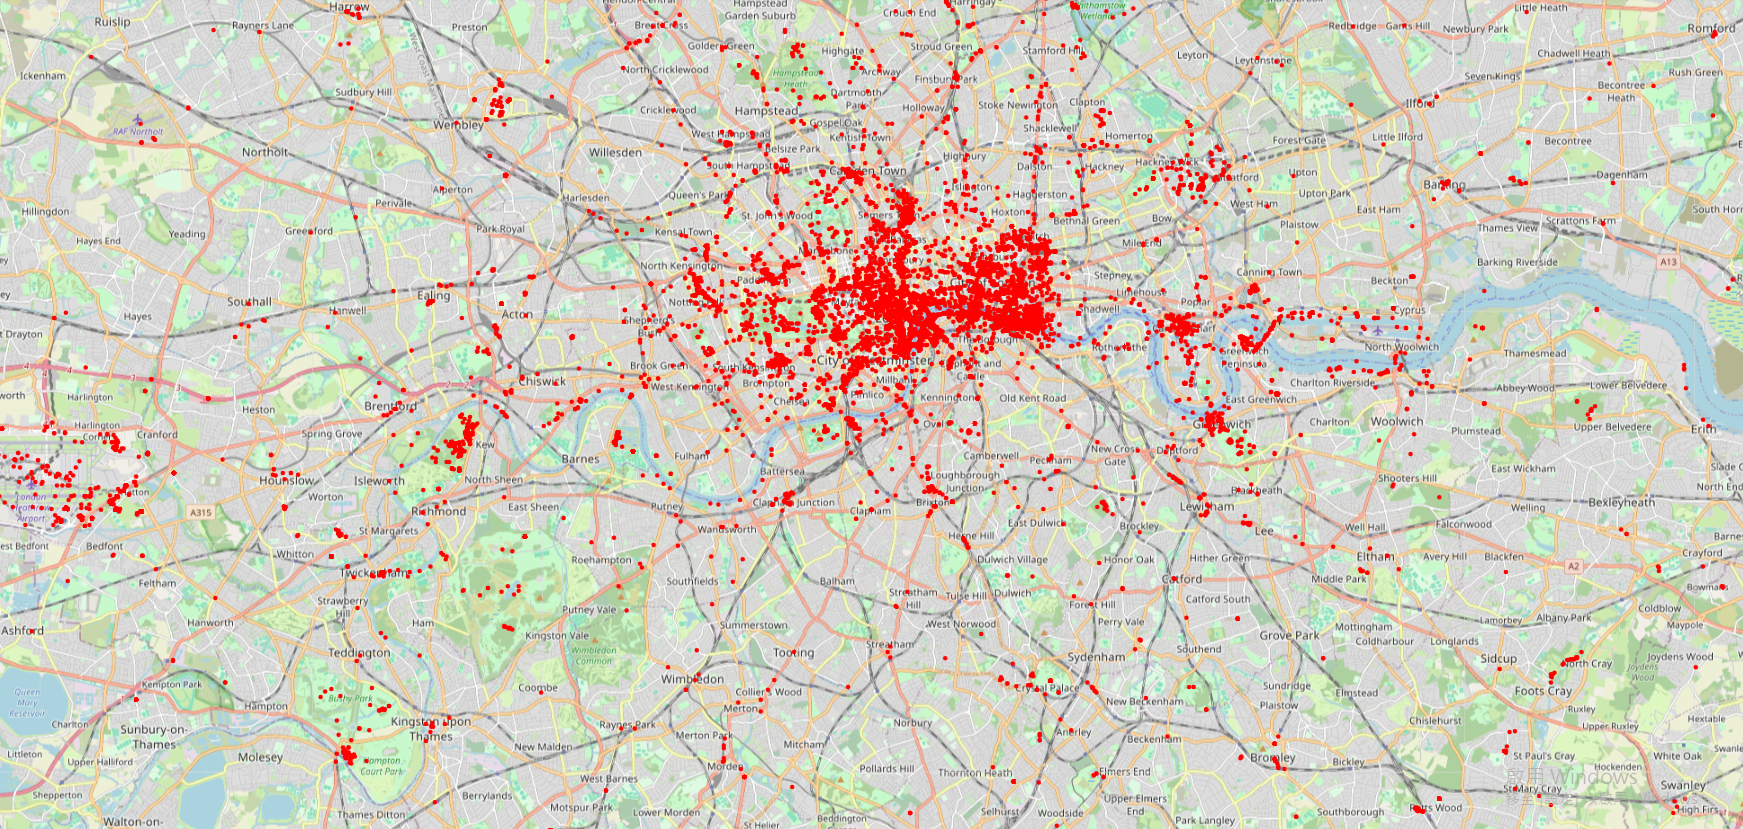

##### DBSCAN 結果

<font size='4'>

```python
eps_1m = 1/6371000 # d = delta * r
eps = eps_1m*100
clusterer = DBSCAN(eps=eps, min_samples=40, metric='haversine').fit(clust_data)
```

</font>

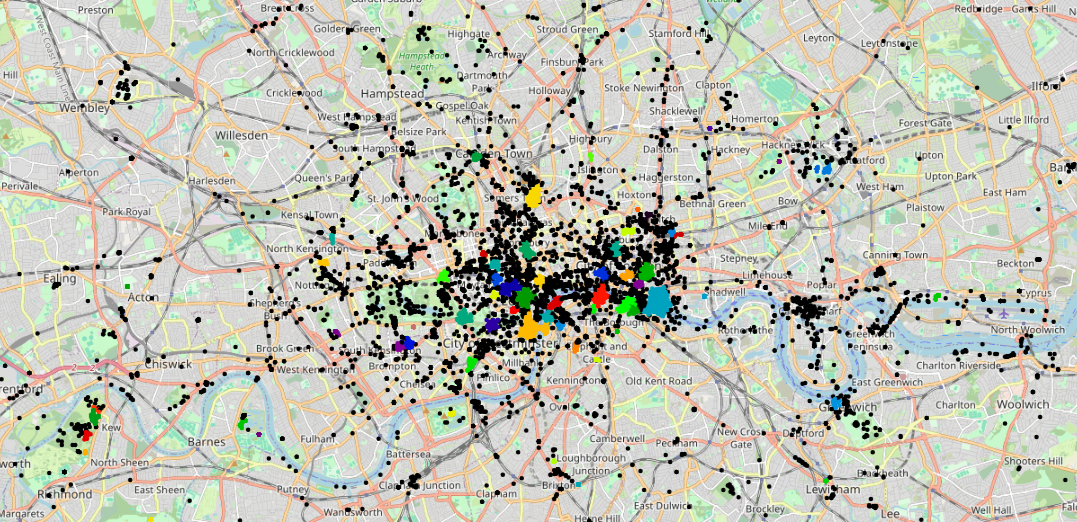

##### HDBSCAN 結果

<font size='4'>

```python
clusterer = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=40,
    metric='haversine'
).fit(clust_data)
```

</font>

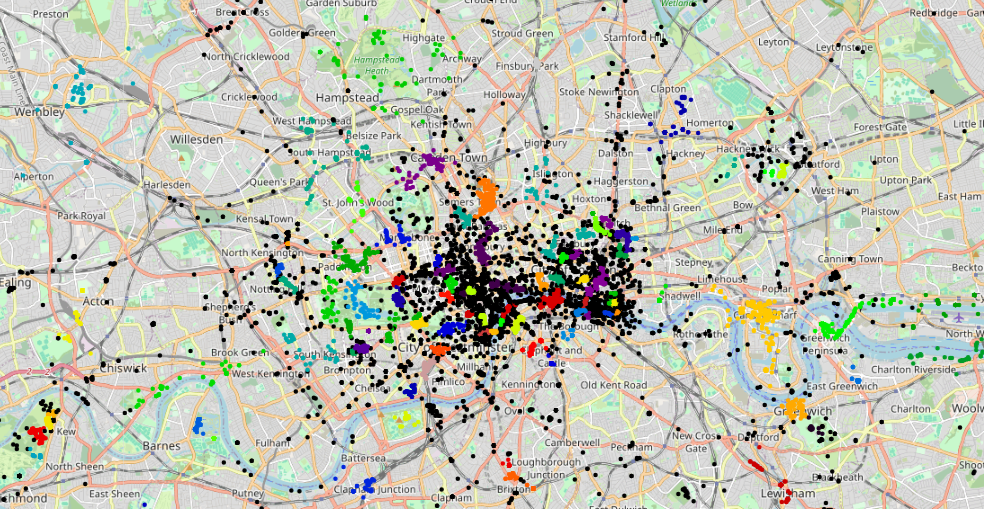